In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.imports import *
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy 
import cv2  

In [3]:
PATH_IMG = Path('./Plant_leaf_diseases_dataset_with_augmentation/')
PATH_IMG.ls()

(#39) [Path('Plant_leave_diseases_dataset_with_augmentation/Apple___Apple_scab'),Path('Plant_leave_diseases_dataset_with_augmentation/Apple___Black_rot'),Path('Plant_leave_diseases_dataset_with_augmentation/Apple___Cedar_apple_rust'),Path('Plant_leave_diseases_dataset_with_augmentation/Apple___healthy'),Path('Plant_leave_diseases_dataset_with_augmentation/Background_without_leaves'),Path('Plant_leave_diseases_dataset_with_augmentation/Blueberry___healthy'),Path('Plant_leave_diseases_dataset_with_augmentation/Cherry___healthy'),Path('Plant_leave_diseases_dataset_with_augmentation/Cherry___Powdery_mildew'),Path('Plant_leave_diseases_dataset_with_augmentation/Corn___Cercospora_leaf_spot Gray_leaf_spot'),Path('Plant_leave_diseases_dataset_with_augmentation/Corn___Common_rust')...]

In [4]:
bs = 64 # batch_size

In [5]:
# Data loader

# parent_label -->> Simply gets the name of the folder a file is in.

img_data = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224),
    batch_tfms=Normalize.from_stats(*imagenet_stats)
)


dls = img_data.dataloaders(PATH_IMG, bs=bs)

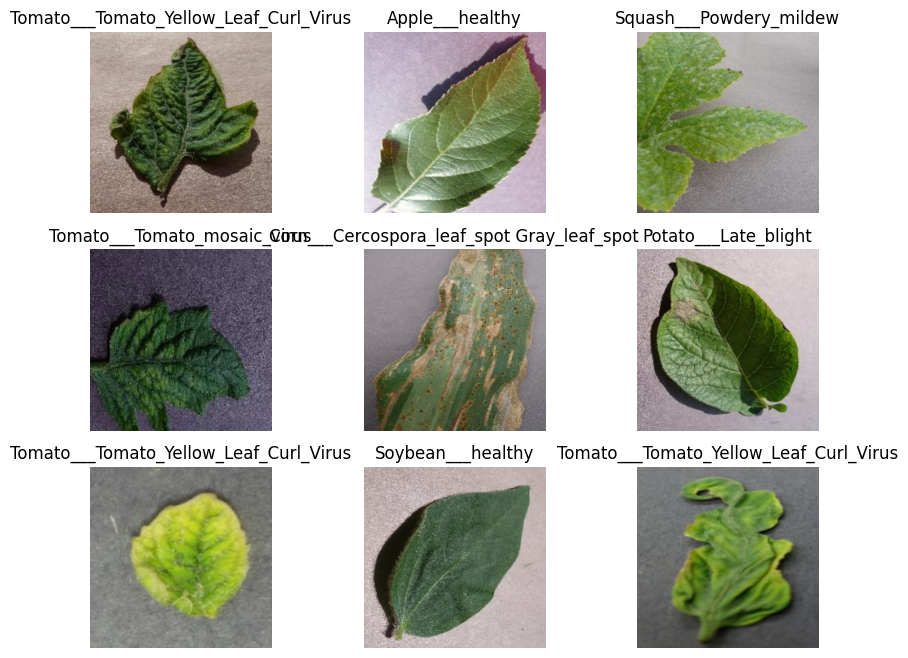

In [6]:
dls.train.show_batch(nrows=3, figsize=(10,8))

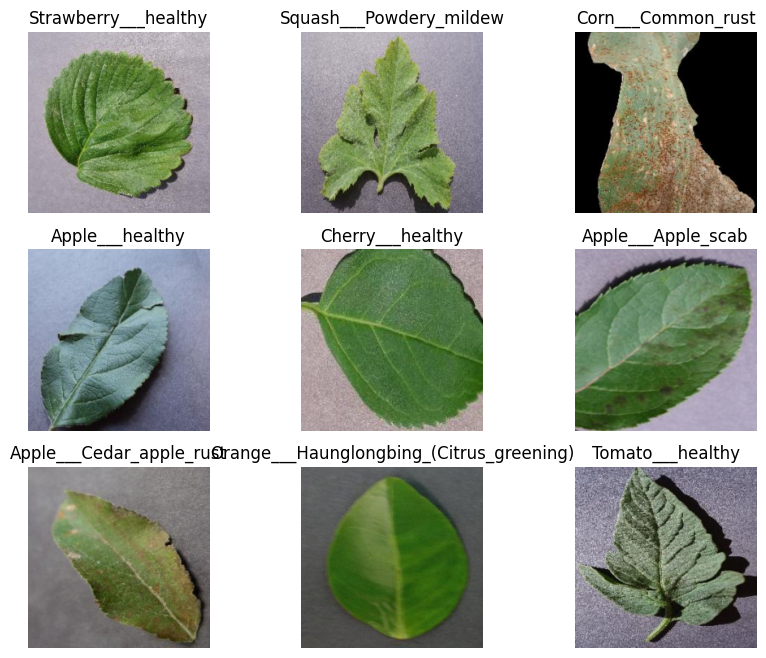

In [7]:
dls.valid.show_batch(nrows=3, figsize=(10,8))

In [8]:
model = cnn_learner(dls, models.resnet34, metrics=[accuracy, error_rate])

b:\ChromaticScan\chromaticscan\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
b:\ChromaticScan\chromaticscan\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
b:\ChromaticScan\chromaticscan\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
# model.fit_one_cycle(5)